In [1]:
#SETUP & DATA LOADING
# Setup & Libraries
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

print(" Libraries loaded!")
print(" Starting Advanced Churn Analysis!")

 Libraries loaded!
 Starting Advanced Churn Analysis!


In [2]:
#Load Segmented Data
# Load the cleaned data
try:
    df = pd.read_csv('customer_churn_cleaned.csv')
    print(" DATA LOADED SUCCESSFULLY!")
    
    
    # Auto-detect churn column (logic from Day 1)
    possible_names = ['Churn', 'Exited', 'churn', 'Attrition_Flag', 'Churn Value']
    churn_col = next((c for c in possible_names if c in df.columns), None)
    
    if churn_col:
        # Ensure churn is numeric (1 and 0) for calculations
        if df[churn_col].dtype == 'object':
            df[churn_col] = df[churn_col].apply(lambda x: 1 if str(x).lower() in ['yes', '1', 'true'] else 0)
        
        churn_rate = (df[churn_col].mean() * 100)
        print(f" Churn Column Identified: '{churn_col}'")
        print(f" Overall Churn Rate: {churn_rate:.2f}%")
    else:
        print(" Error: Churn column not found!")
    
except FileNotFoundError:
    print(" Error: 'customer_churn_cleaned.csv' not found.")

 DATA LOADED SUCCESSFULLY!
 Churn Column Identified: 'Exited'
 Overall Churn Rate: 20.38%


 CUSTOMER SEGMENTATION BY TENURE



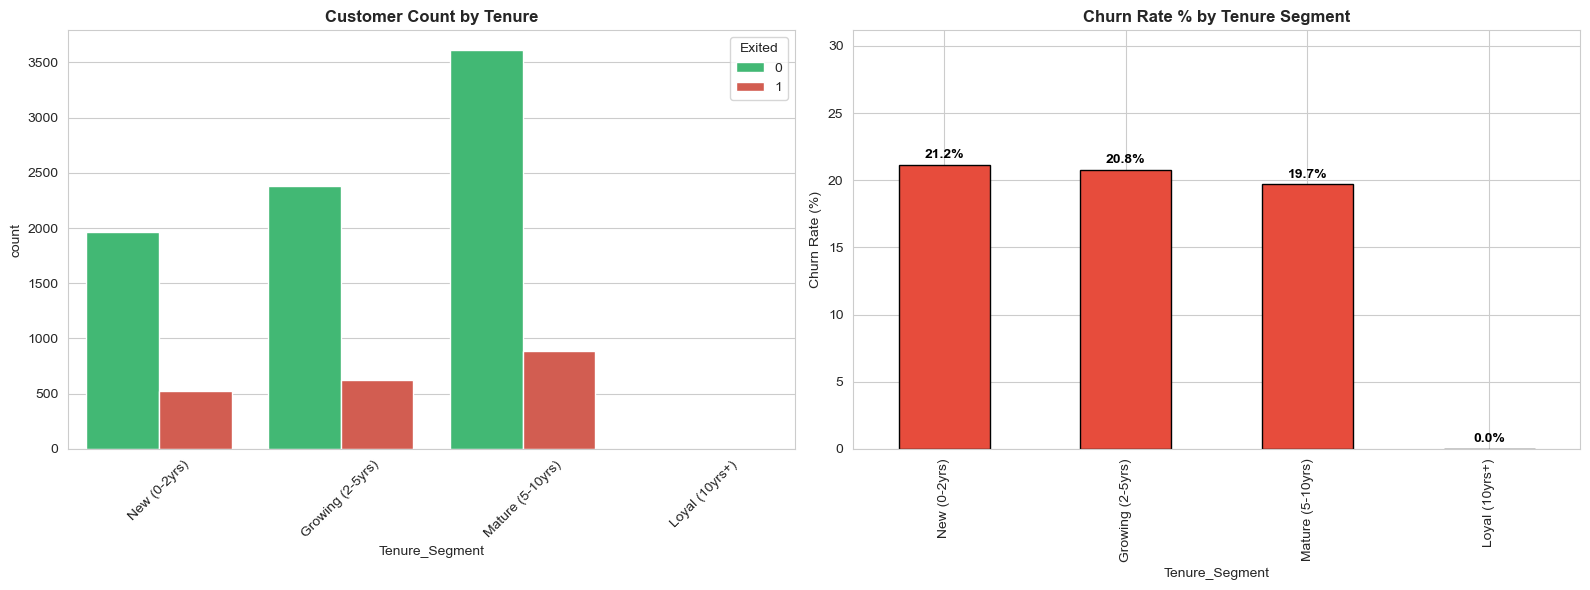

 KEY INSIGHT: Highest churn is in New (0-2yrs) at 21.2%


In [3]:
#SEGMENTATION & DEEP DIVE
#Tenure Segmentation
import numpy as np

print(" CUSTOMER SEGMENTATION BY TENURE\n")

if 'Tenure' in df.columns:
    # 1. Create segments - using 'include_lowest=True' for better binning
    df['Tenure_Segment'] = pd.cut(df['Tenure'], 
                                   bins=[-1, 2, 5, 10, 100], 
                                   labels=['New (0-2yrs)', 'Growing (2-5yrs)', 'Mature (5-10yrs)', 'Loyal (10yrs+)'],
                                   include_lowest=True)
    
    # 2. Calculate churn rate and handle NaN values (fill with 0)
    tenure_churn = df.groupby('Tenure_Segment')[churn_col].mean() * 100
    tenure_churn = tenure_churn.fillna(0) # Fixes the 'finite values' error
    
    # 3. Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Count (Categorical Bar)
    sns.countplot(data=df, x='Tenure_Segment', hue=churn_col, palette=['#2ecc71', '#e74c3c'], ax=ax1)
    ax1.set_title('Customer Count by Tenure', fontweight='bold')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    
    # Plot 2: Churn Rate %
    tenure_churn.plot(kind='bar', color='#e74c3c', ax=ax2, edgecolor='black')
    ax2.set_title('Churn Rate % by Tenure Segment', fontweight='bold')
    ax2.set_ylabel('Churn Rate (%)')
    ax2.set_ylim(0, max(tenure_churn.values) + 10) # Dynamic limit for label space
    
    # 4. SAFETY LOOP: Add labels only if value is finite
    for i, v in enumerate(tenure_churn.values):
        if np.isfinite(v): # Check to ensure the value is a real number
            ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold', color='black')
    
    plt.tight_layout()
    plt.savefig('tenure_segmentation.png')
    plt.show()
    
    # 5. Dynamic Insight
    if tenure_churn.max() > 0:
        print(f" KEY INSIGHT: Highest churn is in {tenure_churn.idxmax()} at {tenure_churn.max():.1f}%")
    else:
        print(" KEY INSIGHT: No churn detected in these segments.")
else:
    print(" Column 'Tenure' not found in DataFrame.")


 BALANCE & SALARY ANALYSIS



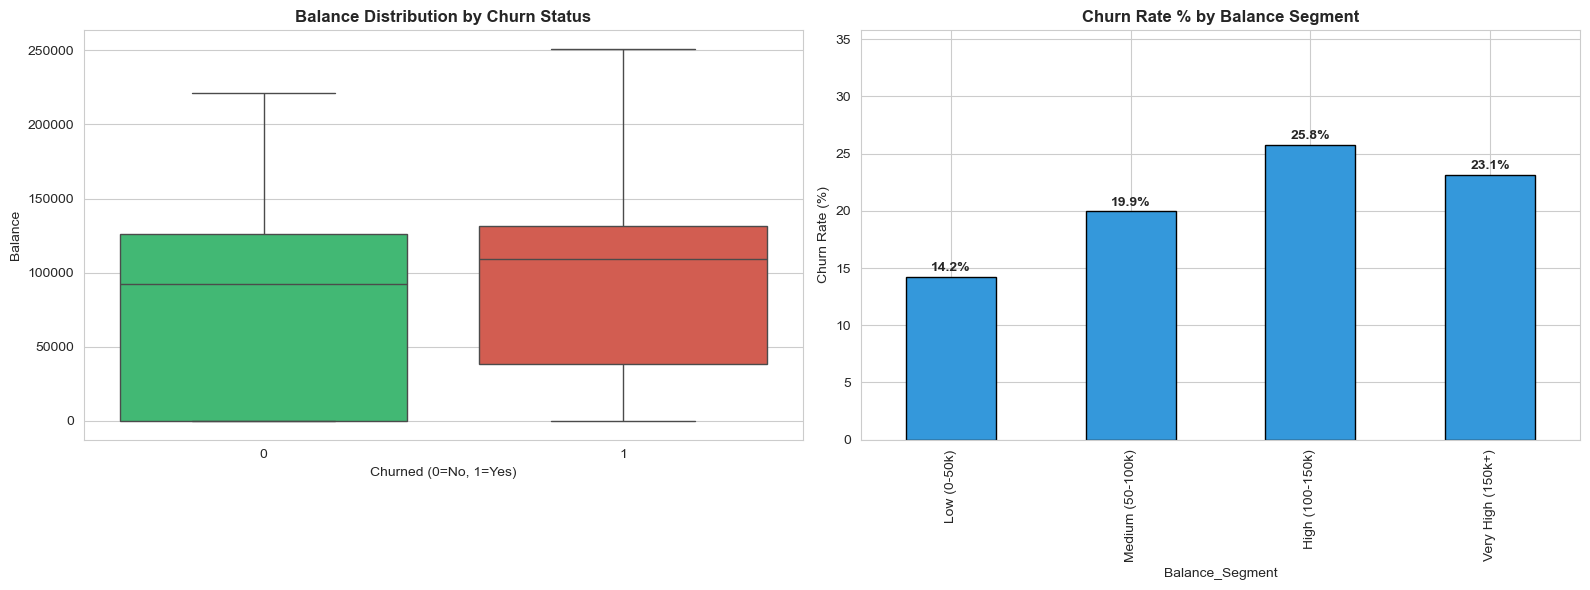

 INSIGHT: Average balance of churned customers: ₹91,109.48
 INSIGHT: Average balance of retained customers: ₹72,742.75


In [4]:
#Financial Impact (Balance & Salary)
import numpy as np

# Financial Impact (Balance & Salary) - Corrected Syntax
print("\n BALANCE & SALARY ANALYSIS\n")

if 'Balance' in df.columns:
    # 1. Define Balance Segments
    # Added include_lowest=True to catch 0 balance accounts
    df['Balance_Segment'] = pd.cut(df['Balance'], 
                                   bins=[-1, 50000, 100000, 150000, 2500000], 
                                   labels=['Low (0-50k)', 'Medium (50-100k)', 'High (100-150k)', 'Very High (150k+)'],
                                   include_lowest=True)
    
    # 2. Setup Plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 3. Left Plot: Boxplot (Distribution)
    sns.boxplot(data=df, x=churn_col, y='Balance', palette=['#2ecc71', '#e74c3c'], ax=axes[0])
    axes[0].set_title('Balance Distribution by Churn Status', fontweight='bold')
    axes[0].set_xlabel('Churned (0=No, 1=Yes)')
    
    # 4. Right Plot: Bar Chart (Churn Rate %)
    # Fillna(0) prevents the 'finite values' error if a segment is empty
    balance_churn = (df.groupby('Balance_Segment')[churn_col].mean() * 100).fillna(0)
    
    balance_churn.plot(kind='bar', color='#3498db', ax=axes[1], edgecolor='black')
    axes[1].set_title('Churn Rate % by Balance Segment', fontweight='bold')
    axes[1].set_ylabel('Churn Rate (%)')
    axes[1].set_ylim(0, max(balance_churn.values) + 10) # Add space for labels
    
    # 5. Add text labels to the bars
    for i, v in enumerate(balance_churn.values):
        if np.isfinite(v):
            axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('balance_analysis.png')
    plt.show()

    # Summary Insight
    avg_bal = df.groupby(churn_col)['Balance'].mean()
    print(f" INSIGHT: Average balance of churned customers: ₹{avg_bal[1]:,.2f}")
    print(f" INSIGHT: Average balance of retained customers: ₹{avg_bal[0]:,.2f}")
else:
    print(" 'Balance' column not found in the dataset.")

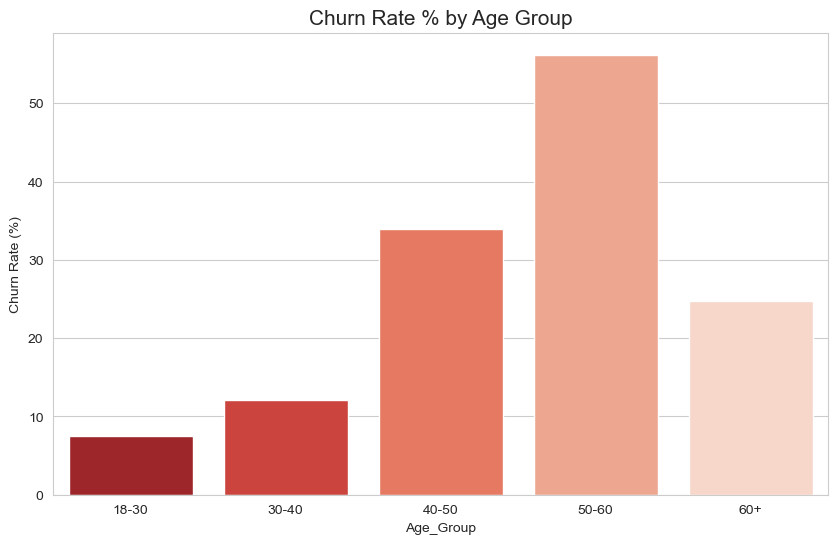

In [5]:
#Age Group Risk Analysis
if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 120], 
                             labels=['18-30', '30-40', '40-50', '50-60', '60+'])
    
    age_churn = df.groupby('Age_Group')[churn_col].mean() * 100
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_churn.index, y=age_churn.values, palette='Reds_r')
    plt.title('Churn Rate % by Age Group', fontsize=15)
    plt.ylabel('Churn Rate (%)')
    plt.savefig('age_group_analysis.png')
    plt.show()

In [6]:
#REVENUE IMPACT & EXPORT
#Revenue at Risk Calculation

print(" REVENUE IMPACT ANALYSIS\n")

total_rev_at_risk = df[df[churn_col] == 1]['Balance'].sum()
avg_rev_per_churn = df[df[churn_col] == 1]['Balance'].mean()

print(f"Total Revenue Currently at Risk: ${total_rev_at_risk:,.2f}")
print(f"Average Loss per Churned Customer: ${avg_rev_per_churn:,.2f}")

# Potential Savings Scenario
print("\n POTENTIAL SAVINGS IF CHURN REDUCED:")
for pct in [10, 20, 30]:
    savings = total_rev_at_risk * (pct/100)
    print(f"   {pct}% Reduction = ${savings:,.2f} saved annually")

 REVENUE IMPACT ANALYSIS

Total Revenue Currently at Risk: $185,681,112.10
Average Loss per Churned Customer: $91,109.48

 POTENTIAL SAVINGS IF CHURN REDUCED:
   10% Reduction = $18,568,111.21 saved annually
   20% Reduction = $37,136,222.42 saved annually
   30% Reduction = $55,704,333.63 saved annually



 REVENUE IMPACT ANALYSIS

 CHURN STATISTICS:
   Total Customers: 10,000
   Churned Customers: 2,038
   Churn Rate: 20.38%

 REVENUE IMPACT:
   Total Revenue at Risk (Balance): ₹185,681,112
   Avg Balance per Churned Customer: ₹91,109

 POTENTIAL SAVINGS (If Churn Reduced):
   10% Reduction → Save ₹18,568,111 (from 204 customers)
   20% Reduction → Save ₹37,136,222 (from 408 customers)
   30% Reduction → Save ₹55,704,334 (from 611 customers)


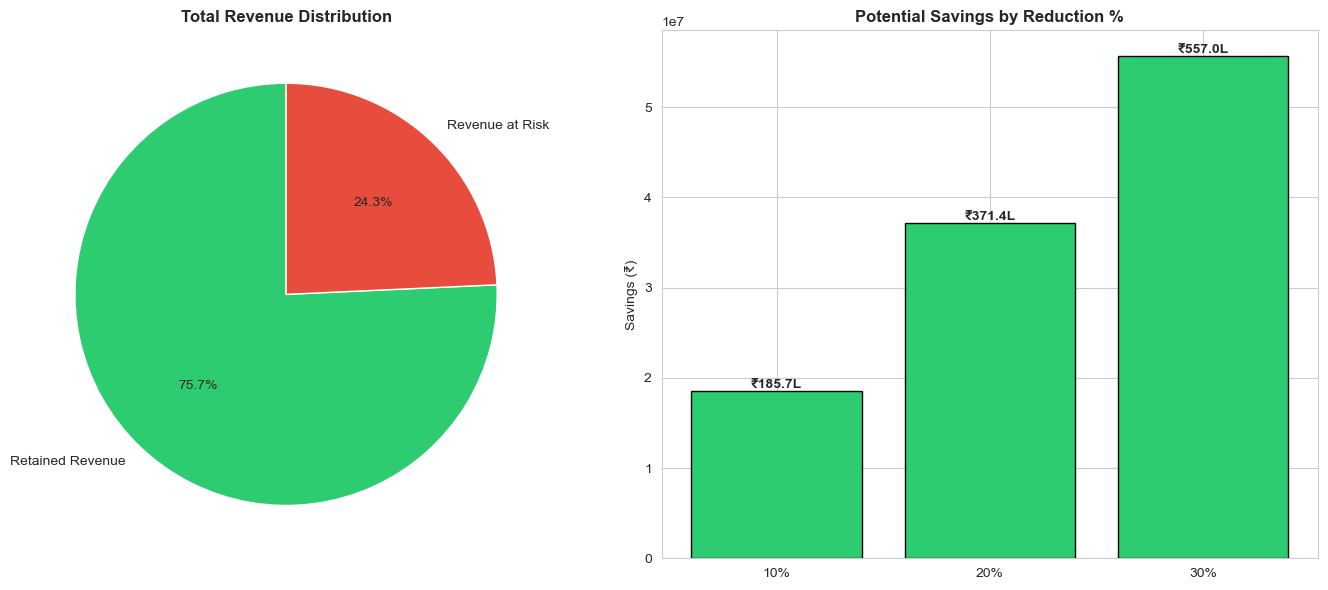

In [9]:
#Revenue Impact Analysis

import matplotlib.pyplot as plt
import pandas as pd

print("\n REVENUE IMPACT ANALYSIS\n")


# Ensure churned/retained dataframes are defined
churned = df[df[churn_col] == 1]
retained = df[df[churn_col] == 0]

# Calculate basic metrics
total_customers = len(df)
churned_count = len(churned)
retained_count = len(retained)
current_churn_rate = (churned_count / total_customers) * 100

print(f" CHURN STATISTICS:")
print(f"   Total Customers: {total_customers:,}")
print(f"   Churned Customers: {churned_count:,}")
print(f"   Churn Rate: {current_churn_rate:.2f}%\n")

if 'Balance' in df.columns:
    total_revenue_at_risk = churned['Balance'].sum()
    avg_rev_churned = churned['Balance'].mean()
    
    print(f" REVENUE IMPACT:")
    print(f"   Total Revenue at Risk (Balance): ₹{total_revenue_at_risk:,.0f}")
    print(f"   Avg Balance per Churned Customer: ₹{avg_rev_churned:,.0f}\n")
    
    print(f" POTENTIAL SAVINGS (If Churn Reduced):")
    reductions = [10, 20, 30]
    savings_list = []
    
    for r in reductions:
        saved_cust = churned_count * (r / 100)
        potential_savings = saved_cust * avg_rev_churned
        savings_list.append(potential_savings)
        print(f"   {r}% Reduction → Save ₹{potential_savings:,.0f} (from {saved_cust:.0f} customers)")

    # Visualization
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Revenue Pie
    plt.subplot(1, 2, 1)
    rev_data = [retained['Balance'].sum(), total_revenue_at_risk]
    plt.pie(rev_data, labels=['Retained Revenue', 'Revenue at Risk'], 
            autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
    plt.title('Total Revenue Distribution', fontweight='bold')
    
    # Plot 2: Savings Bar
    plt.subplot(1, 2, 2)
    bars = plt.bar([f'{r}%' for r in reductions], savings_list, color='#2ecc71', edgecolor='black')
    plt.title('Potential Savings by Reduction %', fontweight='bold')
    plt.ylabel('Savings (₹)')
    
    # Add value labels
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'₹{yval/1e5:.1f}L', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('revenue_impact_analysis.png')
    plt.show()

In [19]:
from fpdf import FPDF

# 1. Initialize PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# 2. Prepare safe text content (Removing Unicode characters like bullet points and emojis)
title = "COMPREHENSIVE BUSINESS INSIGHTS REPORT"

# Use standard dashes instead of bullet points to avoid encoding errors
metrics = f"""
1. OVERALL CHURN METRICS:
   - Total Customers Analyzed: {total_customers:,}
   - Churned Customers: {churned_customers:,}
   - Churn Rate: {churn_rate:.2f}%
   - Customer Retention Rate: {(100 - churn_rate):.2f}%
"""

# 3. Build the PDF content
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt=title, ln=True, align='C')
pdf.ln(10) 

pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=metrics)

if 'Tenure_Segment' in df.columns:
    # Removed emoji and bullet points
    tenure_text = f"2. TENURE INSIGHTS:\n   - Highest churn in: {highest_churn_segment}\n   - Focus on first 2 years of customer lifecycle\n"
    pdf.multi_cell(0, 10, txt=tenure_text)

if 'Age_Group' in df.columns:
    age_text = f"3. DEMOGRAPHIC INSIGHTS:\n   - Highest risk age group: {highest_risk_age}\n   - Tailored retention strategies required\n"
    pdf.multi_cell(0, 10, txt=age_text)

if 'Balance' in df.columns:
    # Replaced ₹ with 'INR'
    fin_text = f"4. FINANCIAL INSIGHTS:\n   - Revenue at Risk: INR {total_revenue_at_risk:,.0f}\n   - Avg balance difference: INR {abs(avg_balance_churned - avg_balance_retained):,.0f}\n"
    pdf.multi_cell(0, 10, txt=fin_text)

if 'IsActiveMember' in df.columns:
    inactive_churn_rate = df[df['IsActiveMember'] == 0][churn_col].mean() * 100
    active_churn_rate = df[df['IsActiveMember'] == 1][churn_col].mean() * 100
    eng_text = f"5. ENGAGEMENT INSIGHTS:\n   - Inactive members churn: {inactive_churn_rate:.1f}%\n   - Active members churn: {active_churn_rate:.1f}%\n"
    pdf.multi_cell(0, 10, txt=eng_text)

risk_factors = """
6. KEY RISK FACTORS:
   - Low tenure (< 2 years)
   - Low account activity
   - High number of products
   - Specific age demographics
"""
pdf.multi_cell(0, 10, txt=risk_factors)

# 4. Save the PDF
pdf_file = "Customer_Churn_Business_Report.pdf"
pdf.output(pdf_file)

print(f" SUCCESS: Report saved as {pdf_file}")

 SUCCESS: Report saved as Customer_Churn_Business_Report.pdf


In [21]:
from fpdf import FPDF

# 1. Initialize PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=11)

# 2. Title Section
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="STRATEGIC BUSINESS RECOMMENDATIONS", ln=True, align='C')
pdf.ln(10)

# 3. Recommendations Content
# We use multi_cell for long text blocks to handle automatic line wrapping
recommendations = """
RETENTION STRATEGIES:

1. EARLY INTERVENTION PROGRAM (First 2 Years)
   * Welcome package and onboarding support
   * Regular check-ins during first 6 months
   * Personalized product recommendations
   * Dedicated relationship manager for new customers

2. ENGAGEMENT INITIATIVES
   * Gamification rewards for app usage
   * Personalized offers based on transaction patterns
   * Financial literacy webinars and workshops
   * Mobile banking feature tutorials

3. SEGMENT-SPECIFIC STRATEGIES
   * Young Customers: Digital-first approach
   * Middle Age: Investment advisory, insurance products
   * Senior Citizens: Branch support, simplified processes
   * High-value customers: Premium services, priority support

4. PRODUCT OPTIMIZATION
   * Simplify product portfolio
   * Bundle complementary services
   * Clear value proposition communication

5. PREDICTIVE INTERVENTION
   * Implement churn prediction model
   * Automated alerts for at-risk customers
   * Targeted retention offers

6. FEEDBACK MECHANISM
   * Regular customer satisfaction surveys
   * Exit interviews for churning customers
   * Act on feedback promptly
"""

pdf.set_font("Arial", size=11)
pdf.multi_cell(0, 8, txt=recommendations)

# 4. Impact & Priority Section
pdf.ln(5)
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, txt="EXPECTED BUSINESS IMPACT:", ln=True)
pdf.set_font("Arial", size=11)
pdf.multi_cell(0, 8, txt="- 10-15% reduction in churn rate\n- Improved customer lifetime value (CLV)\n- Enhanced brand reputation")

pdf.ln(5)
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, txt="IMPLEMENTATION PRIORITY:", ln=True)
pdf.set_font("Arial", size=11)
pdf.multi_cell(0, 8, txt="HIGH: Early intervention, Engagement programs\nMEDIUM: Segment strategies, Product optimization\nLOW: Advanced analytics setup")

# 5. Save the PDF
output_file = "Churn_Retention_Recommendations.pdf"
pdf.output(output_file)

print(f" SUCCESS: Business Recommendations saved as {output_file}")

 SUCCESS: Business Recommendations saved as Churn_Retention_Recommendations.pdf


In [22]:
#Final Export
# Save the final segmented dataset
df.to_csv('customer_churn_segmented.csv', index=False)

print(" Analysis Complete!")
print(" Files Saved: 'customer_churn_segmented.csv' and all .png charts.")


 Analysis Complete!
 Files Saved: 'customer_churn_segmented.csv' and all .png charts.
